In [ ]:
# 1. Các thư viện cần thiết
import numpy as np
import pandas as pd
from matplotlib import pyplot
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_percentage_error,mean_absolute_error

In [ ]:
# 2. Đọc file dữ liệu chứng khoán AAPL và chia train test validate theo tỉ lệ 7:1:2
data = pd.read_csv('/content/ETH-USD.csv')
df = data[['Close']]
df = df.dropna() # Drop missing values
df = df.reset_index(drop=True) # Reset the index

# Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = int(0.1 * len(df))
val_size = len(df) - train_size - test_size

train_data = df[:train_size]
test_data = df[train_size:train_size+test_size]
val_data = df[train_size+test_size:]

In [ ]:
df.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Close,2018.0,161.246802,181.096355,2.07023,15.078957,29.227297,308.03019,675.684082


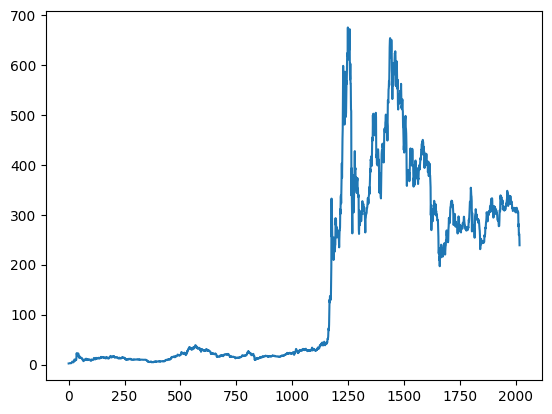

In [ ]:
pyplot.plot(df)
pyplot.show()

In [ ]:
!pip install pmdarima

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
# 3. Quá trình Training
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Close'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=18703.771, Time=4.41 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=18720.833, Time=0.06 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=18715.468, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=18715.503, Time=0.19 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=18719.386, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=18719.469, Time=0.42 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=18719.469, Time=0.33 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=18705.551, Time=3.32 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=18685.933, Time=3.48 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=18715.591, Time=1.24 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=18701.665, Time=4.87 sec
 ARIMA(2,1,4)(0,0,0)[0] intercept   : AIC=18687.920, Time=4.76 sec
 ARIMA(1,1,4)(0,0,0)[0] intercept   : AIC=18703.666, Time=1.88 sec
 ARIMA(3,1,4)(0,0,0)[0] intercept   : AIC=18698.236, Time=7.02 sec
 ARIMA(2,1,3)(0,0,0

ARIMA(order=(2, 1, 3), scoring_args={}, suppress_warnings=True,
      with_intercept=False)

In [ ]:
# 4. Quá trình testing
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Close'])
y_pred = model.predict(n_periods=len(y_test))

# 5. Quá trình Validate
x_val= np.array(val_data.index).reshape(-1, 1)
y_val = np.array(val_data['Close'])
y_pred_val =  model.predict(n_periods=len(y_val))

In [ ]:
# 6. Quá trình tạo index predict 30 ngày tiếp theo
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# Create an array of 30 consecutive integers starting from last_index
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)

# Predict the closing prices for the next 30 days
y_next_30_days = model.predict(n_periods=len(x_next_30_days))

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[3513.53601431 3496.59559534 3510.28547331 3499.22241997 3508.16268588
 3500.93788527 3506.77638542 3502.0581813  3505.87105268 3502.78979807
 3505.2798191  3503.26758528 3504.89371008 3503.5796074  3504.64155902
 3503.78337551 3504.47689009 3503.91644764 3504.36935195 3504.00335128
 3504.29912345 3504.06010428 3504.25326026 3504.0971672  3504.223309
 3504.12137139 3504.20374913 3504.13717809 3504.19097543 3504.14750077]


In [ ]:
# 7. Đánh giá độ chính xác validate, test
#valid_rmse = np.sqrt(np.mean((y_pred_val - y_val)**2))
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
#print('Validation RMSE:', valid_rmse)
print('Testing RMSE:', test_rmse)

Testing RMSE: 1366.6774451551341


In [ ]:
#val_mape = mean_absolute_percentage_error(y_val, y_pred_val)
test_mape = mean_absolute_percentage_error(y_test, y_pred)
#print("Validation MAPE:", val_mape)
print("Test MAPE:", test_mape * 100)

Test MAPE: 93.89144522385013


In [ ]:
#val_mase = mean_absolute_error(y_val, y_pred_val)
test_mse = mean_absolute_error(y_test, y_pred)
#print("Validation MAE:", val_mase)
print("Test MAE:", test_mse)

Test MAE: 1322.070489802063


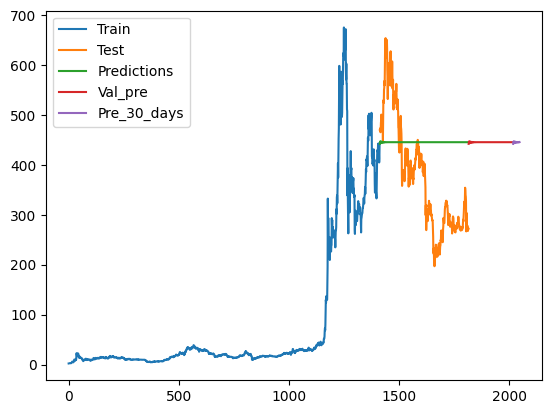

In [ ]:
# 9.Vẽ hình
plt.plot(train_data.index, train_data['Close'])
plt.plot(test_data.index, test_data['Close'])
plt.plot(test_data.index, y_pred)
plt.plot(val_data.index, y_pred_val)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Val_pre','Pre_30_days'])
plt.show()